In [1]:
# Extração de Dados, com filtro para o df
import requests
import pandas as pd
import ast # Biblioteca para converter strings em objetos Python com segurança
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

print("Extração de Dados")

# 5000 para pegar varios projeto
url = "https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento?uf=DF&page=0&size=5000"

try:
    response = requests.get(url, timeout=60) #espera ate 60 segundos
    
    #Tudo esta em json
    dados_paginados = response.json()

    #Esta na parte .content
    lista_projetos = dados_paginados.get('content', [])

    #Tratamento para o conteudo caso a lista esteja cheia, caso contrario mensagem de erro
    if lista_projetos:
        df = pd.DataFrame(lista_projetos)
        print("Dados do DF extraídos com sucesso!")
        print(f"Total de {len(df)} projetos encontrados para o Distrito Federal.")
    else:
        print("API respondeu, mas nao retornou os projetos.")
        df = pd.DataFrame()

# Se qualquer erro acontecer no bloco 'try'
except requests.exceptions.HTTPError as http_err: 
    print(f"ERRO HTTP: {http_err}")
    
except requests.exceptions.RequestException as e:
    print(f"ERRO ao acessar a API: {e}")

df.head() # Exibe as 5 primeiras linhas para confirmar

Extração de Dados
Dados do DF extraídos com sucesso!
Total de 10 projetos encontrados para o Distrito Federal.


,idUnico,nome,cep,endereco,descricao,funcaoSocial,metaGlobal,dataInicialPrevista,dataFinalPrevista,dataInicialEfetiva,...,observacoesPertinentes,isModeladaPorBim,dataSituacao,tomadores,executores,repassadores,eixos,tipos,subTipos,fontesDeRecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,None,None,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,...,None,False,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,None,None,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,...,None,False,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,...,None,False,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,None,None,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,...,None,False,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",None,None,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,...,None,False,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."


In [2]:
# Busca exploratória dos dados:
# Visão geral dos dados: colunas, dimensões, tipos de variáveis, taxas de valores nulos.
# Estatísticas descritivas
# Qualidade dos dados

print("BUSCA EXPLORATÓRIA DE DADOS")
print("Visão geral dos dados: colunas, dimensões, tipos de variáveis, taxas de valores nulos.")

# A lista de todas as colunas.
# O tipo de cada coluna (Dtype). 
# Quantos valores não-nulos cada uma tem (ajuda a ver dados faltando).
print("\nColunas e tipos de varáveis")
df.info()

#Dimensoes
print("\nDimensões")
print(f"O conjunto de dados possui {df.shape[0]} linhas (projetos) e {df.shape[1]} colunas (atributos).")

#Contagem de Valores Nulos por Coluna
print("\nContagem de Valores Nulos por Coluna (Colunas com alta taxa de nulos são fortes candidatas à remoção na etapa de limpeza)")
nulos = df.isnull().sum()
percentual = (nulos / len(df)) * 100

x_nulos = pd.DataFrame({'Contagem de Nulos': nulos, 'Percentual(%)': percentual})
print(x_nulos[x_nulos['Contagem de Nulos'] > 0].sort_values(by='Percentual(%)', ascending=False))

#Estatísticas Descritivas
print("\nEstatísticas para colunas numéricas (média, desvio padrão, etc.) e categóricas (valores únicos, mais frequente).")

# display() melhora a formatacao, include='all' para ver também as colunas de texto
display(df.describe(include='all').transpose())

BUSCA EXPLORATÓRIA DE DADOS
Visão geral dos dados: colunas, dimensões, tipos de variáveis, taxas de valores nulos.

Colunas e tipos de varáveis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   idUnico                             10 non-null     object
 1   nome                                10 non-null     object
 2   cep                                 6 non-null      object
 3   endereco                            6 non-null      object
 4   descricao                           10 non-null     object
 5   funcaoSocial                        10 non-null     object
 6   metaGlobal                          10 non-null     object
 7   dataInicialPrevista                 10 non-null     object
 8   dataFinalPrevista                   10 non-null     object
 9   dataInicialEfetiva                  0 non-nul

,count,unique,top,freq
idUnico,10,10,50379.53-54,1
nome,10,8,202111-22-Ronald 1,3
cep,6,4,70067-901,2
endereco,6,3,2021122-Ronald - Endereço Completo,3
descricao,10,8,2021122-Ronald - Descrição do Projeto,3
funcaoSocial,10,8,2021122-Ronald - Descrição Funç]ap Social,3
metaGlobal,10,8,20211122-Ronald - Descrição Meta Global,3
dataInicialPrevista,10,8,2021-12-10,3
dataFinalPrevista,10,8,2021-12-10,3
dataInicialEfetiva,0,0,NaN,NaN


In [3]:
# Tratamento dos Dados

print("Tratamento dos Dados")

# Copia do DateFrame
df_tratado = df.copy()

# Remoção de Linhas Duplicadas (usando a coluna de ID como referência)
dupli = df_tratado.duplicated(subset=['idUnico']).sum() 
if dupli > 0:
    df_tratado.drop_duplicates(subset=['idUnico'], keep='first', inplace=True) # Remove duplicatas mantendo a primeira ocorrência
print(f"{dupli} linhas duplicadas foram encontradas e removidas com base no 'idUnico'.")


# Padronização dos Nomes das Colunas (camelCase para snake_case, facilita na padronização)
novos_nomes = {
    'idUnico': 'id_unico',
    'funcaoSocial': 'funcao_social',
    'metaGlobal': 'meta_global',
    'dataInicialPrevista': 'data_inicial_prevista',
    'dataFinalPrevista': 'data_final_prevista',
    'dataCadastro': 'data_cadastro',
    'naturezaOutras': 'natureza_outras',
    'descPlanoNacionalPoliticaVinculado': 'desc_plano_nacional',
    'qdtEmpregosGerados': 'qdt_empregos_gerados',
    'descPopulacaoBeneficiada': 'desc_populacao_beneficiada',
    'populacaoBeneficiada': 'populacao_beneficiada',
    'observacoesPertinentes': 'observacoes_pertinentes',
    'isModeladaPorBim': 'modelada_por_bim',
    'dataSituacao': 'data_situacao',
    'fontesDeRecurso': 'fontes_recurso'
}
df_tratado.rename(columns=novos_nomes, inplace=True) #renomeia as colunas

# Remoção de Colunas Irrelevantes (alta taxa de nulos)
colunas_remover = [
    'data_inicial_efetiva','observacoes_pertinentes','data_final_efetiva','natureza_outras','cep', 'endereco','modelada_por_bim' #as que sobraram podem ajudar nos insgihts
]
df_tratado.drop(columns=colunas_remover, inplace=True, errors='ignore') #'ignore' evita erro se a coluna já foi renomeada/removida

# Tipagem Adequada e Extração de Valores

# Valor Numérico
def extrair_valor_investimento(texto_lista):
    try:
        lista = ast.literal_eval(str(texto_lista))
        
        if isinstance(lista, list) and len(lista) > 0:
            return lista[0].get('valorInvestimentoPrevisto', 0)
        return 0.0
    except:
        return 0.0
df_tratado['valor_total_previsto'] = df_tratado['fontes_recurso'].apply(extrair_valor_investimento) #vem para nova coluna tipado com numérico

# Data para o tipo datetime
colunas_data = ['data_inicial_prevista', 'data_final_prevista', 'data_cadastro', 'data_situacao']
for col in colunas_data:
    df_tratado[col] = pd.to_datetime(df_tratado[col], errors='coerce') #'coerce' coloca como nulo oque não tiver dado

# Conversão de colunas numéricas (quantidade para formato numerico)
colunas_num = ['qdt_empregos_gerados', 'populacao_beneficiada']
for col in colunas_num:
    df_tratado[col] = pd.to_numeric(df_tratado[col], errors='coerce')

# Valores Ausentes 
# Após a conversão para numérico, valores inválidos viram 'NaN', agora estarão com 0.
df_tratado.fillna({
    'qdt_empregos_gerados': 0,
    'populacao_beneficiada': 0
}, inplace=True)

Tratamento dos Dados
0 linhas duplicadas foram encontradas e removidas com base no 'idUnico'.


In [4]:
# Preparação Final do DataFrame para Armazenamento em Banco de Dados

# Documentação do Processo 
print("O objetivo desta célula é garantir que todos os dados sejam compatíveis com o formato do banco de dados SQL.")
print("Bancos de dados relacionais não suportam tipos de dados complexos como listas ou dicionários do Python diretamente.")
print("A solução é converter essas colunas para uma representação em texto (string).\n")

# Detecção Automática de Colunas com Listas/Dicionários 
colunas_para_converter = []
for coluna in df_tratado.columns:
    # Pega o primeiro valor não-nulo da coluna para verificar seu tipo
    if not df_tratado[coluna].dropna().empty:
        primeiro_valor = df_tratado[coluna].dropna().iloc[0]
        # Se o tipo do valor for uma lista ou um dicionário, marca a coluna para conversão
        if isinstance(primeiro_valor, (list, dict)):
            colunas_para_converter.append(coluna)

if colunas_para_converter:
    print(f"Colunas com tipos complexos detectadas automaticamente: {colunas_para_converter}\n")

    # Conversão das Colunas Detectadas para String 
    for coluna in colunas_para_converter:
        df_tratado[coluna] = df_tratado[coluna].astype(str) #altera seu tipo
    print("Conversão concluída com sucesso!")

else:
    print("Nenhuma coluna com tipos complexos foi detectada para conversão.")


# --- Verificação Final ---
print("\n--- Verificação dos Tipos de Dados Após Conversão ---")
# Exibe as informações para confirmar que as colunas agora são 'object' (string)
df_tratado.info()

O objetivo desta célula é garantir que todos os dados sejam compatíveis com o formato do banco de dados SQL.
Bancos de dados relacionais não suportam tipos de dados complexos como listas ou dicionários do Python diretamente.
A solução é converter essas colunas para uma representação em texto (string).

Colunas com tipos complexos detectadas automaticamente: ['tomadores', 'executores', 'repassadores', 'eixos', 'tipos', 'subTipos', 'fontes_recurso']

Conversão concluída com sucesso!

--- Verificação dos Tipos de Dados Após Conversão ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_unico                    10 non-null     object        
 1   nome                        10 non-null     object        
 2   descricao                   10 non-null     object        
 3   funcao_social               10 n

In [5]:
# Armazenamento dos Dados

# Documentação do Processo 
print("O Banco escolhido foi o SQLite, por ser leve e acesso rápido, e realizado no software Jupyter, através do Framework Anaconda.")
print("O processo cria um único arquivo (.db) no diretório do projeto, sem necessidade de servidor.")

# Criação da Conexão
# A função create_engine estabelece a conexão com o arquivo do banco.
engine = create_engine('sqlite:///obras_df.db')
nome_tabela = 'projetos_df_tratados'

# Carregamento dos Dados
# O método to_sql é usado para inserir os dados do DataFrame na tabela especificada.
# if_exist=replace, cria a tabela novamente
df_tratado.to_sql(nome_tabela, engine, if_exists='replace', index=False)
print(f"Dados carregados com sucesso na tabela '{nome_tabela}'.")

# Verificação da Inserção 
# Para garantir que os dados foram salvos corretamente, vamos ler a tabela de volta para um novo DataFrame.
print("\nVerificando os dados no banco...")
try:
    df_verificacao = pd.read_sql_table(nome_tabela, engine)
    print("   Leitura do banco de dados bem-sucedida!")
    print(f"   A tabela '{nome_tabela}' contém {df_verificacao.shape[0]} linhas.")
    display(df_verificacao.head())
except Exception as e:
    print(f"   Ocorreu um erro ao tentar ler os dados do banco: {e}")

O Banco escolhido foi o SQLite, por ser leve e acesso rápido, e realizado no software Jupyter, através do Framework Anaconda.
O processo cria um único arquivo (.db) no diretório do projeto, sem necessidade de servidor.
Dados carregados com sucesso na tabela 'projetos_df_tratados'.

Verificando os dados no banco...
   Leitura do banco de dados bem-sucedida!
   A tabela 'projetos_df_tratados' contém 10 linhas.


,id_unico,nome,descricao,funcao_social,meta_global,data_inicial_prevista,data_final_prevista,dataInicialEfetiva,dataFinalEfetiva,data_cadastro,...,populacao_beneficiada,data_situacao,tomadores,executores,repassadores,eixos,tipos,subTipos,fontes_recurso,valor_total_previsto
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,None,2024-12-20,...,0.0,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi...",44463443.00
1,42724.53-27,Escola Classe Crixá São Sebastião,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,None,2024-08-30,...,385.0,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi...",12319519.51
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,None,2023-02-06,...,0.0,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi...",1177429.91
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,None,2023-08-28,...,0.0,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi...",10800000.00
4,24822.53-70,"obra de construção da Cabine de Medição, loca...","obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,None,2023-08-29,...,0.0,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi...",928139.70


C:\Users\Marcos\AppData\Local\Temp\ipykernel_2704\4162380251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


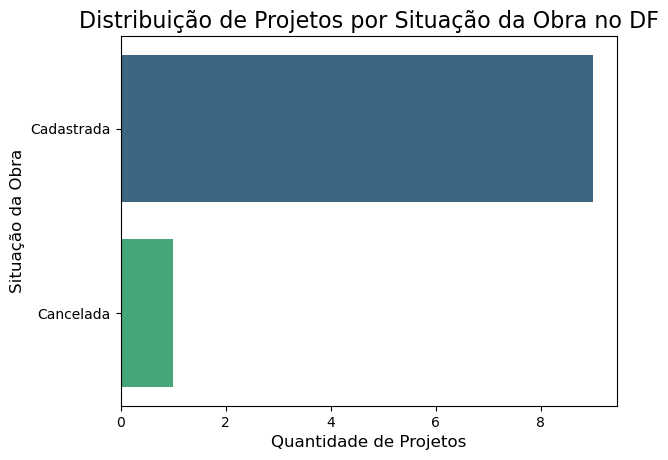

In [6]:
# Gráfico 1 - Contagem de Obras por Situação no DF

plt.title('Distribuição de Projetos por Situação da Obra no DF', fontsize=16)
ax = sns.countplot(
    y=df_tratado['situacao'], 
    order=df_tratado['situacao'].value_counts().index, 
    palette='viridis'
)
ax.set_xlabel('Quantidade de Projetos', fontsize=12)
ax.set_ylabel('Situação da Obra', fontsize=12)
plt.show()

In [7]:
### Análise do Gráfico 1: Situação das Obras no DF

**1. Padrão Identificado:**
O gráfico de barras mostra claramente que a grande maioria dos projetos de obras no Distrito Federal se encontra na situação **"Cadastrada"**. As outras categorias, como "Em Execução" ou "Concluída", aparecem com uma frequência muito menor.

**2. Hipóteses e Insights:**
Essa forte concentração em "Cadastrada" pode ter algumas explicações:
* **Hipótese Positiva:** Indica uma massa de projetos novos, que podem ser inseridos no sistema urbano, podendo indicar uma melhora na infraestrutura do DF.
* **Hipótese Crítica:** Em contra partida pode indicar também um gargalo imenso nos processos, salientando possível desvio de verba e alta burocracia para executar os projetos.

**3. Explicação para um Público Não Técnico:**
Em termos simples, é como se muitos carros estivessem alinhados na linha de largada de uma corrida (projetos "cadastrados"), mas poucos já tivessem de fato começado a correr (projetos "em execução"). Isso nos leva a perguntar: a corrida está prestes a começar com muitos participantes ou há algum problema impedindo a largada?

SyntaxError: invalid syntax (2124979307.py, line 3)

In [ ]:
# Gráfico 2 - Distribuição do Valor Total Previsto no DF

# Filtra valores maiores que 0 
valores_validos = df_tratado[df_tratado['valor_total_previsto'] > 0]['valor_total_previsto']

plt.title('Distribuição do Valor Total dos Projetos no DF (em milhões de R$)', fontsize=16)
ax = sns.histplot(valores_validos / 1e6, bins=20, kde=True)
ax.set_xlabel('Valor Total Previsto (em Milhões de R$)', fontsize=12)
ax.set_ylabel('Frequência (Quantidade de Projetos)', fontsize=12)
plt.show()

In [ ]:
### Análise do Gráfico 2: Distribuição dos Valores dos Projetos

**1. Padrão Identificado:**
O histograma revela uma **distribuição assimétrica à direita**. Isso significa que a grande maioria dos projetos possui um custo previsto relativamente baixo (concentrados principalmente na faixa de 0 a 10 milhões de reais), enquanto um número muito pequeno de projetos possui um custo extremamente elevado.

**2. Hipóteses e Insights :**
* **Hipótese:** A estratégia de investimento em obras no DF parece ser focada na **pulverização de recursos**. Ou seja, prefere-se executar um grande número de obras dadas como menores e mais pontuais ao invés de concentrar o orçamento em poucos mega-projetos.

**3. Explicação para um Público Não Técnico:**
Imagine a distribuição de renda em uma cidade: a maioria das pessoas tem uma renda modesta (as barras altas e à esquerda do nosso gráfico), mas existem alguns poucos bilionários (as barras baixinhas e muito à direita). O mesmo acontece aqui: a maioria das obras são de menor porte.

In [ ]:
# Conclusão Geral do Projeto

##  Resumo do Processo

Este projeto concluo um ciclo completo de análise de dados, desde a coleta até a apresentação de insights. O processo seguiu as seguintes etapas:
* **Extração:** Conexão com a API oficial e coleta otimizada dos dados, filtrando apenas os projetos do DF.
* **Tratamento e Normalização:** Limpeza dos dados brutos, incluindo a remoção de duplicatas, padronização de nomes de colunas, correção de tipos de dados (datas e números) e tratamento de valores ausentes.
* **Armazenamento:** Persistência dos dados limpos em um banco de dados relacional (SQLite), garantindo a integridade e a possibilidade de consultas futuras.
* **Análise e Visualização:** Criação de gráficos para explorar padrões e extrair conclusões a partir dos dados tratados.

---

## Principais Descobertas (Insights da Análise)

A análise visual dos dados nos permitiu identificar dois padrões principais sobre as obras no Distrito Federal:

### Insight 1: Predominância de Projetos em Fase de Cadastro
O primeiro gráfico revelou que a grande maioria dos projetos se encontra na situação **"Cadastrada"**, sugerindo um volume significativo de obras planejadas mas que ainda não iniciaram a execução. A hipótese é que pode haver tanto um planejamento ativo de novos projetos quanto um possível gargalo burocrático que atrasa o início efetivo das obras.

### Insight 2: Foco em Obras de Menor Custo
O segundo gráfico demonstrou uma forte concentração de projetos com custo previsto abaixo de R$ 10 milhões. Isso indica uma estratégia de **pulverização de recursos**, com foco em um grande número de obras menores e mais pontuais, em vez de concentrar o orçamento em poucos mega-projetos.

---

## Conclusão Final
O desafio promoveu a integração e extração de dados de uma API, praticou tratamento de dados, armazenou-os de forma estruturada e extraiu insights valiosos. A análise indica que o cenário de obras públicas no Distrito Federal é caracterizado por um **grande volume de planejamento e um foco em projetos de menor porte financeiro**. Para uma análise futura, seria interessante investigar o tempo médio que um projeto leva para sair da situação "Cadastrada" e se os poucos projetos de alto custo possuem um ciclo de vida diferente dos demais.